# 7. Segmentácia obrazu prahovaním

In [2]:
import numpy as np
from skimage import data, filters
import matplotlib.pyplot as plt

from skimage.morphology import disk

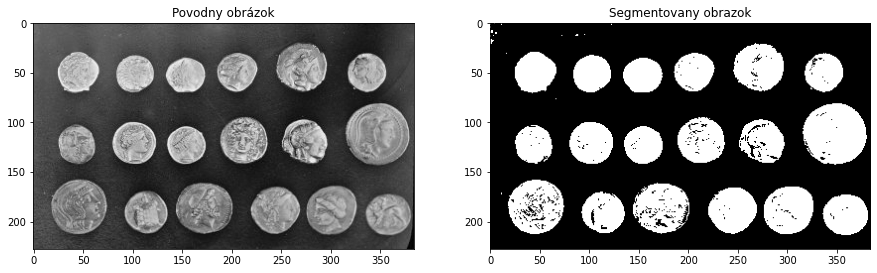

In [ ]:
I = data.coins()
I = I[75:,:]
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title("Povodny obrázok")
plt.imshow(I,cmap='gray')
plt.subplot(122)
seg_I = I > 105
plt.title("Segmentovany obrazok")
plt.imshow(seg_I,cmap='gray')

Text(0, 0.5, 'Pixel count ')

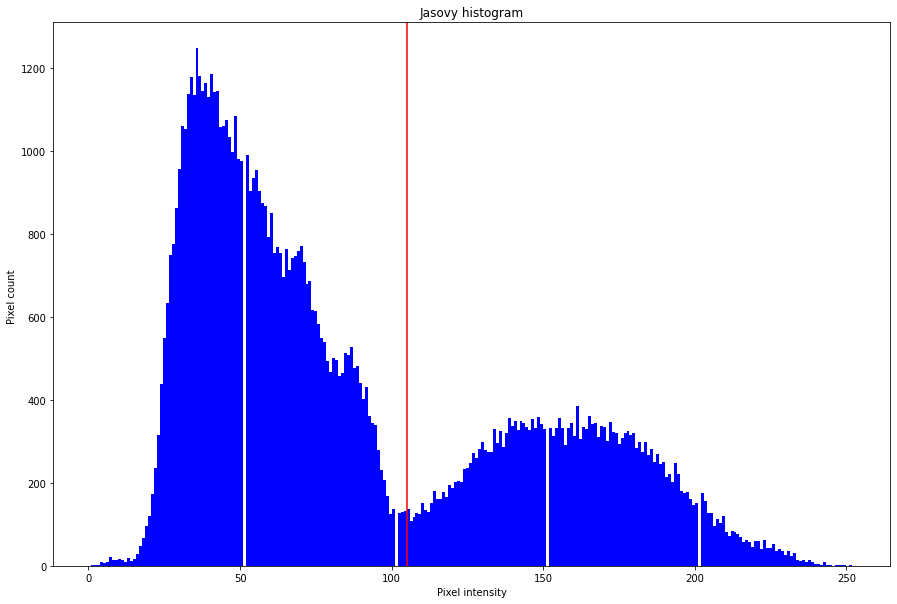

In [ ]:
plt.figure(figsize=(15, 10))
ax1  = plt.subplot(111)
plt.hist(I.ravel(), bins=256, histtype='bar', color='blue')
ax1.axvline(105, color='r')

plt.title("Jasovy histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count ")

In [ ]:
I1 = I.astype(np.double)
sum_corners = I1[1,1]+I1[1,-1]+I1[-1,1]+I1[-1,1]
Ave_bgr = sum_corners/4

Ave_obj = (np.sum(I1)-sum_corners)/(I1.shape[0]*I1.shape[1]-4)

Tresh = (Ave_bgr + Ave_obj)/2

In [ ]:
mean_object_intensity = np.mean(I[seg_I])
mean_background_intensity = np.mean(I[seg_I==0])

threshold = (mean_object_intensity+mean_background_intensity)/2

In [ ]:
counter = 0

while True:
    background  = I < threshold
    obj = I >= threshold

    mean_object_intensity = np.mean(I[obj])
    mean_background_intensity = np.mean(I[background])

    new_threshold = (mean_object_intensity + mean_background_intensity)/2
    #new_threshold = (mean_object_intensity*1.25 + mean_background_intensity*0.75)/2

    if np.abs(threshold - new_threshold) < 0.1:
        break
    counter = counter + 1
    threshold = new_threshold
print("Converged to optimal threshold in {} iteration with threshold: {}".format(counter,threshold))

Converged to optimal threshold in 1 iteration with threshold: 107.95877673512632


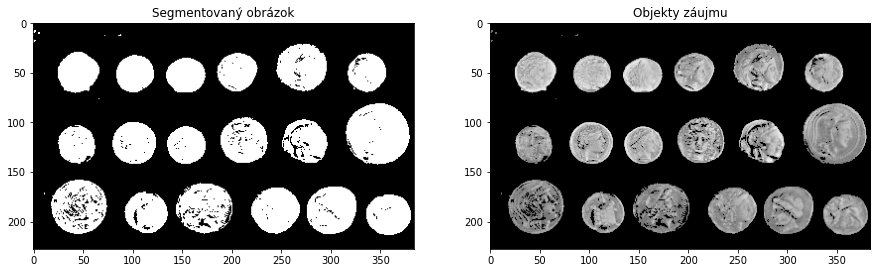

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Segmentovaný obrázok")
plt.imshow(I>threshold,cmap='gray')
plt.subplot(122)
plt.title("Objekty záujmu")
plt.imshow(I * (I>threshold),cmap='gray')

## Nerovnormerne osvetlenie

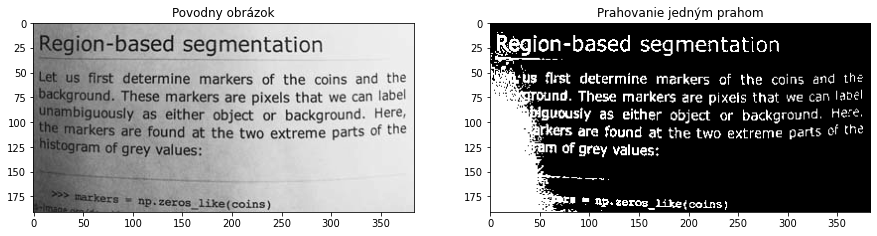

In [ ]:
I2 = data.page()
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title("Povodny obrázok")
plt.imshow(I2,cmap='gray')
plt.subplot(122)
plt.title("Prahovanie jedným prahom")
plt.imshow(I2<120,cmap='gray')

## Ukazka co ponuka skimage

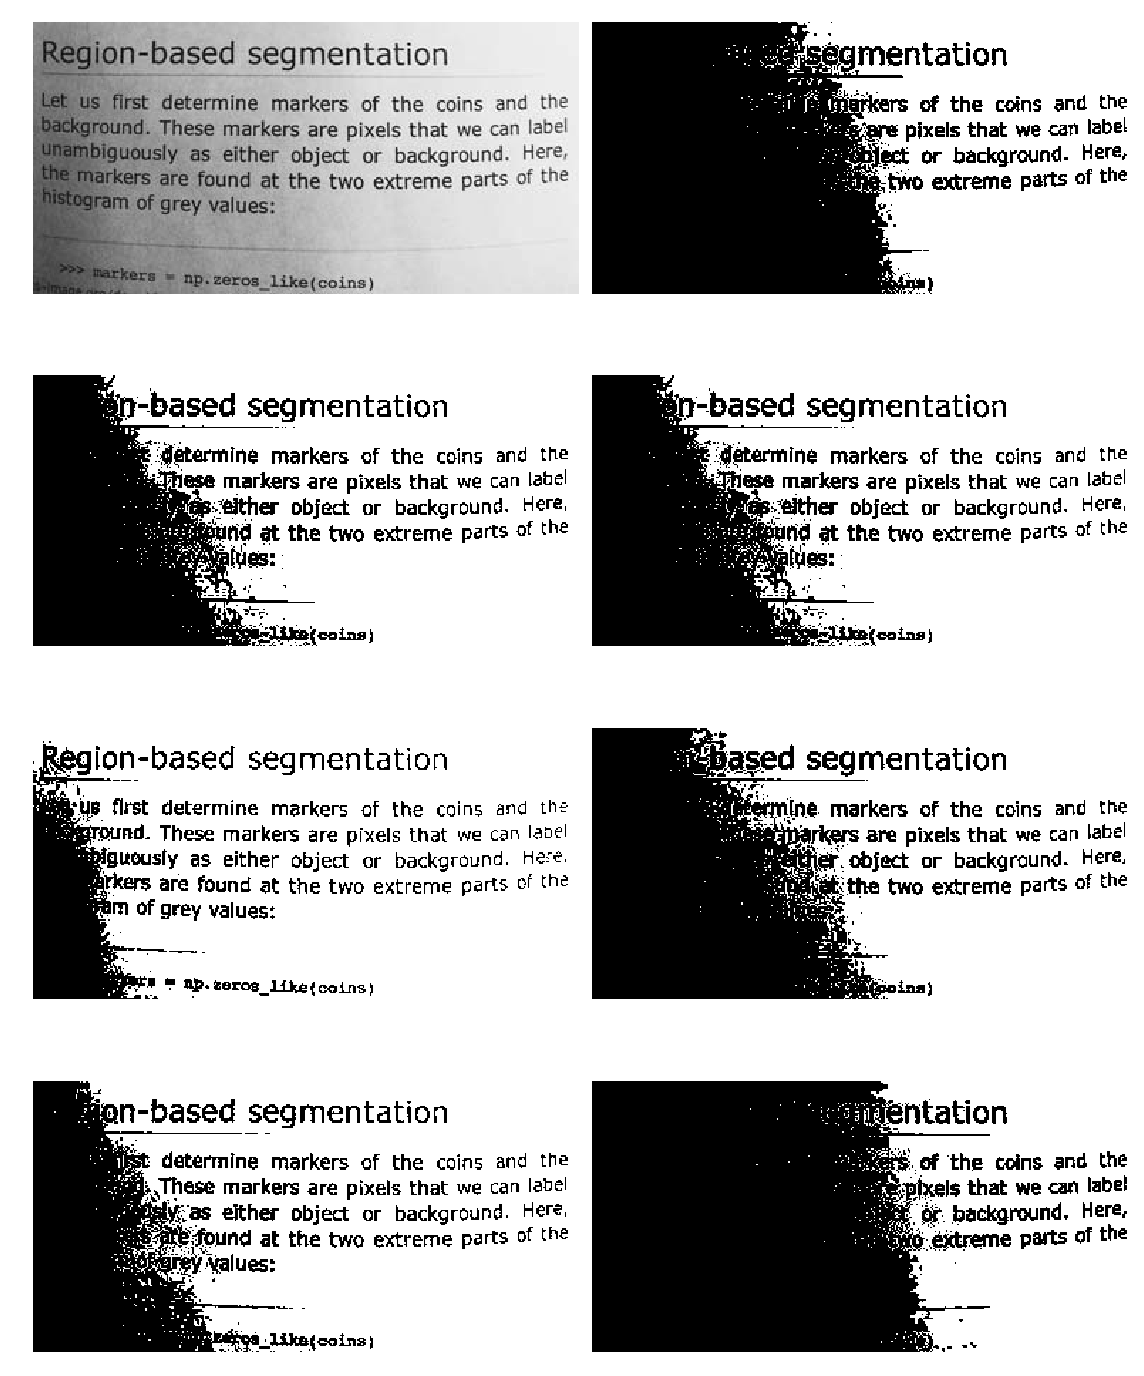

In [ ]:
fig, ax = filters.try_all_threshold(I2, figsize=(16, 20), verbose=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


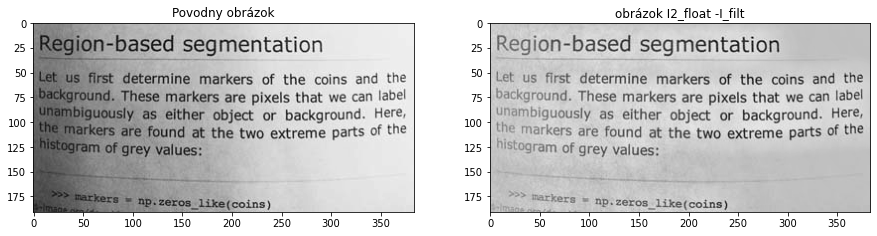

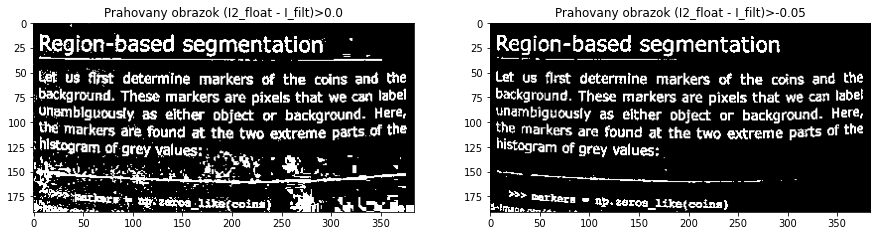

In [ ]:
s_elem = disk(20)

I2_float = I2/255
I_filt  = filters.rank.mean(I2_float,selem=s_elem)/255
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Povodny obrázok")
plt.imshow(I2_float,cmap = "gray")
plt.subplot(122)
plt.title("obrázok I2_float -I_filt")
plt.imshow((I2_float -I_filt),cmap = "gray")
im_t1 = (I2_float - I_filt) < 0.0
im_t2 = (I2_float - I_filt) < -0.05
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title('Prahovany obrazok (I2_float - I_filt)>0.0')
plt.imshow(im_t1,cmap = "gray")
plt.subplot(122)
plt.title('Prahovany obrazok (I2_float - I_filt)>-0.05')
plt.imshow(im_t2,cmap = "gray")

Text(0.5, 1.0, 'B')

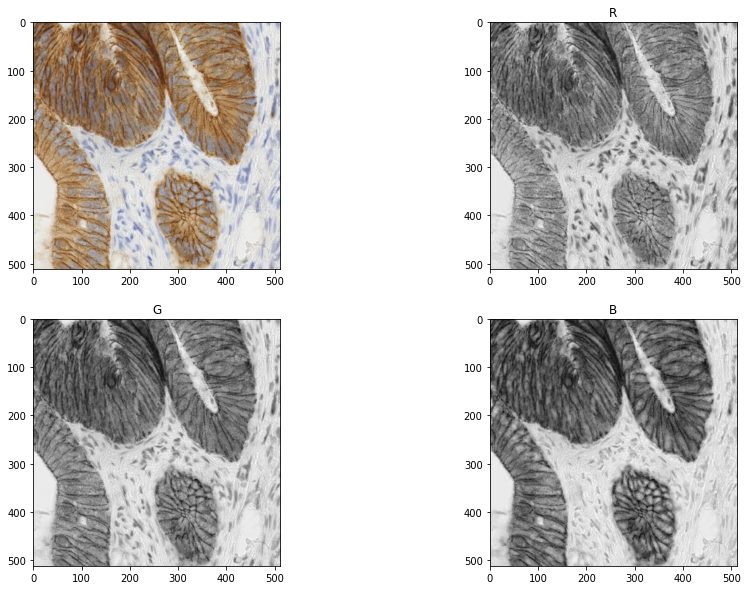

In [4]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)
plt.subplot(222)
plt.imshow(I3[:,:,0],cmap='gray')
plt.title('R')
plt.subplot(223)
plt.imshow(I3[:,:,1],cmap='gray')
plt.title('G')
plt.subplot(224)
plt.imshow(I3[:,:,2],cmap='gray')
plt.title('B')

Text(0.5, 1.0, 'Result mask')

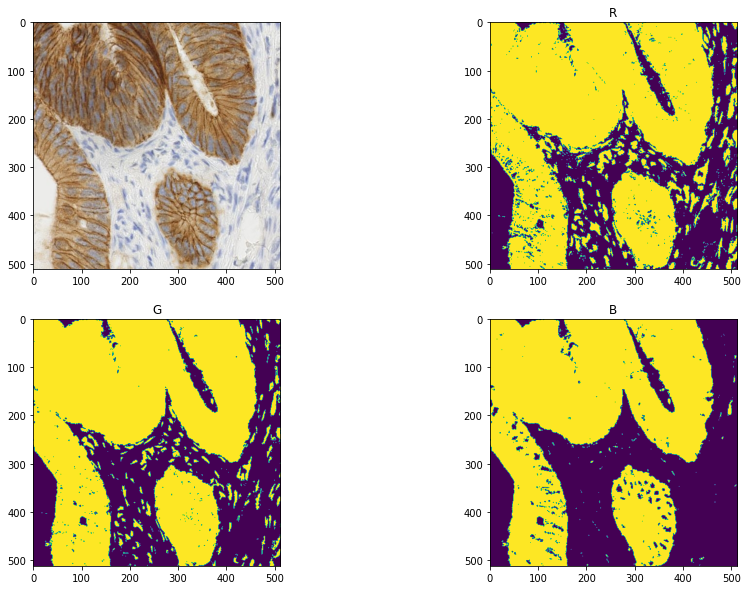

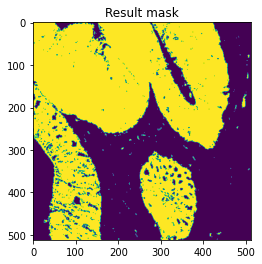

In [5]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)

plt.subplot(222)
t_R =I3[:,:,0]<200
plt.imshow(t_R)
plt.title('R')

plt.subplot(223)
t_G = I3[:,:,1]<185
plt.imshow(t_G)
plt.title('G')

plt.subplot(224)
t_B = I3[:,:,2]<160
plt.imshow(t_B)
plt.title('B')


plt.figure()
mask = np.logical_and(np.logical_and(t_R,t_G),t_B)
plt.imshow(mask)
plt.title('Result mask')

#  The CIELAB color space
(also known as CIE L*a*b* or sometimes incorrectly abbreviated as simply "Lab" color space) is a color space defined by the International Commission on Illumination (CIE) in 1976. It expresses color as three values: L* for the lightness from black (0) to white (100), a* from green (−) to red (+), and b* from blue (−) to yellow (+). CIELAB was designed so that the same amount of numerical change in these values corresponds to roughly the same amount of visually perceived change.

Text(0.5, 1.0, 'b')

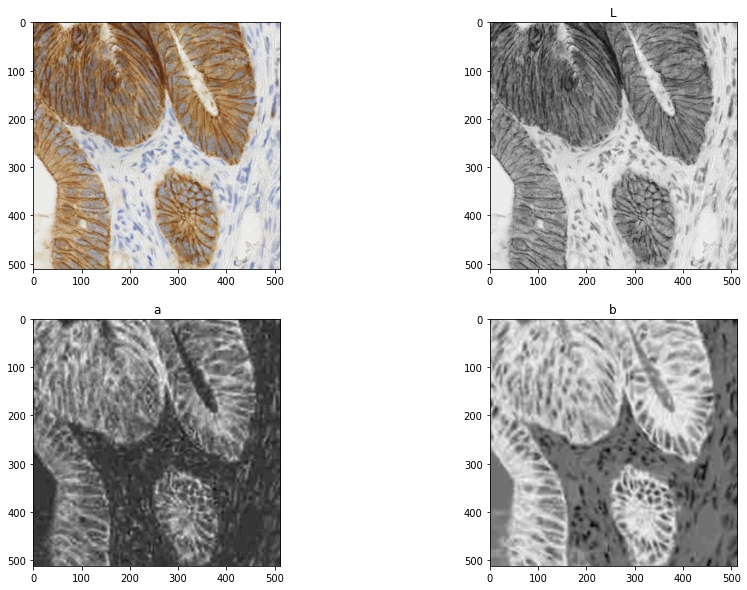

In [40]:
from skimage import color
I3_lab = color.rgb2lab(I3)
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.imshow(I3)
plt.subplot(222)
plt.imshow(I3_lab[:,:,0],cmap='gray')
plt.title('L')
plt.subplot(223)
plt.imshow(I3_lab[:,:,1],cmap='gray')
plt.title('a')
plt.subplot(224)
plt.imshow(I3_lab[:,:,2],cmap='gray')
plt.title('b')

# D.U odsegmentovat obrazok v CIELAbe a dokoncit cvicenie podla knihy

100.0
(512, 512)


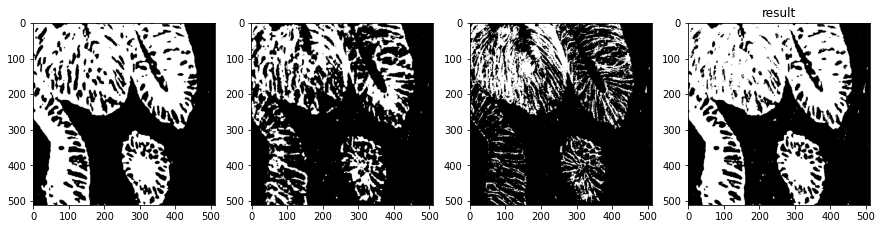

In [238]:
print(np.max(I3_lab[:,:,0]))

img = I3_lab[:,:,0]
plt.figure(figsize=(15, 10))
print(img.shape)
Y = I3_lab[:,:,2] > 14
Z = I3_lab[:,:,1] > 8
G = I3_lab[:,:,0] < 50

A = np.logical_and(I3_lab[:,:,0] > 0,I3_lab[:,:,0] < 50)

X = np.logical_or(np.logical_or(Y,Z),G)

plt.subplot(1,4,1)
plt.imshow(Y,cmap="gray")
plt.subplot(1,4,2)
plt.imshow(Z,cmap="gray")
plt.subplot(1,4,3)
plt.imshow(G,cmap="gray")
plt.subplot(1,4,4)
plt.title("result")
plt.imshow(X,cmap="gray")